In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from scipy.stats import ttest_ind

In [72]:
# Load the CSV file into a DataFrame
data = pd.read_csv('clarityAI_data.csv')

In [73]:
# Verify the data type of 'metric_year'
print(data['metric_year'].dtype)

int64


In [74]:
# Inspect the data
print(data.head())
print(data.info())
print(data.describe())

                   clarity_id           metric  metric_year provider_code  \
0  01FF543RN5MZWC981FMFGMM6E4  CO2DIRECTSCOPE1         2017          TRC8   
1  01FF543SRJYTXND0M7XQC1TP4J  CO2DIRECTSCOPE1         2005          TRC8   
2  01FF543VB1A9CJMHM3ECG1RB6Z  CO2DIRECTSCOPE1         2014          TRC1   
3  01FF543T095C9344VSA8AX6M7X  CO2DIRECTSCOPE1         2017          TRC8   
4  01FF543WBGY98G1H88BVQG93P0  CO2DIRECTSCOPE1         2008          TRC1   

  clarity_industry_code       clarity_industry_name country_code  \
0            25301040/0                 Restaurants           GB   
1            25102010/0    Automobile Manufacturers           KR   
2            15104040/0  Precious Metals & Minerals           BM   
3            35101020/0        Health Care Supplies           JP   
4            15101050/0         Specialty Chemicals           US   

   co2directscope1_raw       revenue  co2directscope1_intensity  \
0         9.412684e+05  7.648087e+04                  12.3072

## Average CO2 Emissions

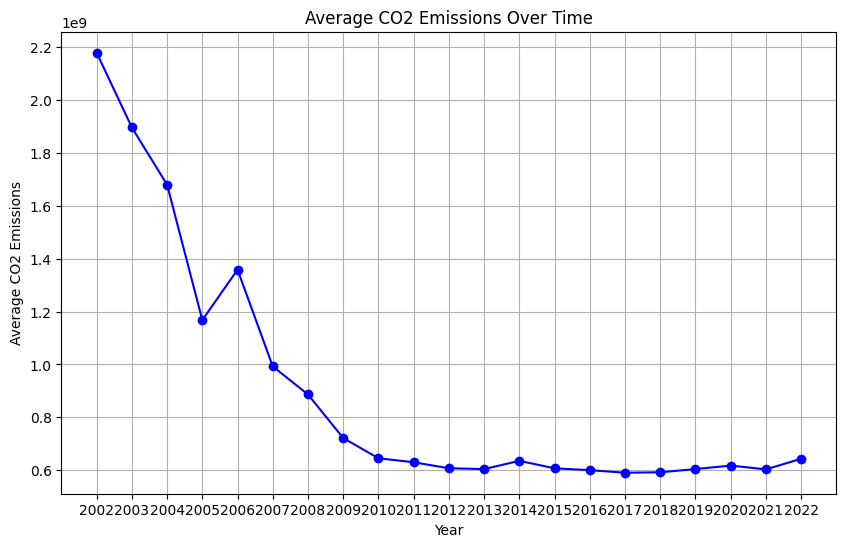

In [76]:
# Group by year and calculate the mean CO2 emissions
average_co2_per_year = data.groupby('metric_year')['co2directscope1_raw'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_co2_per_year['metric_year'], average_co2_per_year['co2directscope1_raw'], marker='o', linestyle='-', color='b')
plt.title('Average CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions')

# Set the x-axis ticks to integers
plt.xticks(average_co2_per_year['metric_year'].unique())

plt.grid(True)
plt.show()

# Provider Code

  provider_code  co2directscope1_raw
0          TRC1         6.632169e+08
1          TRC8         7.603020e+08


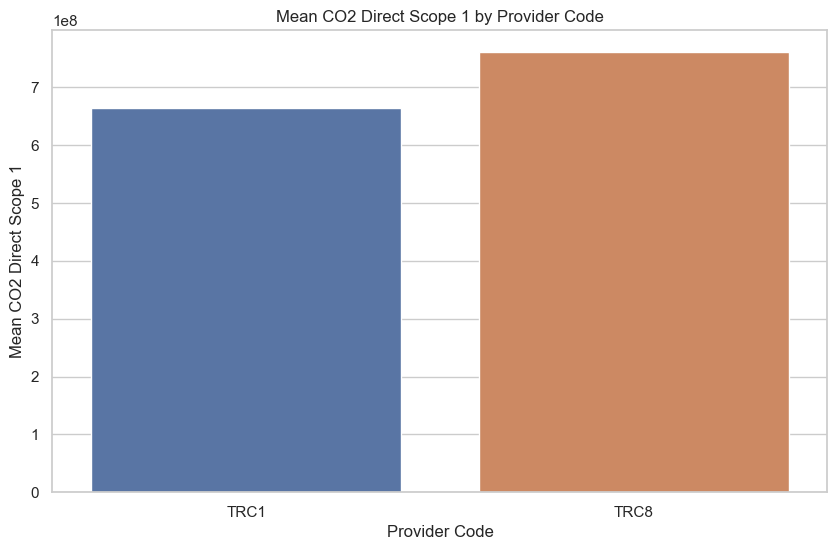

T-statistic: -2.4420692671995052, P-value: 0.014614808205458423
There is a statistically significant difference between the two provider codes.


In [26]:
# Calculate the mean of co2directscope1_raw for each category in provider_code
mean_co2 = data.groupby('provider_code')['co2directscope1_raw'].mean().reset_index()
print(mean_co2)

# Plot the means using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='provider_code', y='co2directscope1_raw', data=mean_co2)
plt.title('Mean CO2 Direct Scope 1 by Provider Code')
plt.xlabel('Provider Code')
plt.ylabel('Mean CO2 Direct Scope 1')
plt.show()

# Perform t-tests between groups
provider_code_1 = 'TRC1'
provider_code_2 = 'TRC8'

group1 = data[data['provider_code'] == provider_code_1]['co2directscope1_raw']
group2 = data[data['provider_code'] == provider_code_2]['co2directscope1_raw']

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Use equal_var=False if variance is not assumed to be equal
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference between the two provider codes.")
else:
    print("There is no statistically significant difference between the two provider codes.")


## Analysis on Country-wise, Industry-wise, and Company-wise CO2 Emissions and Revenue

This section provides an exploratory data analysis (EDA) focusing on the CO2 emissions and revenue data categorized by country, industry, and company. The analysis includes:
- **Country-wise Analysis**: Visualizations showing the frequency distribution, average CO2 emissions, and revenue per country.
- **Industry-wise Analysis**: Visualizations showing the frequency distribution, average CO2 emissions, and revenue per industry.
- **Company-wise Analysis**: Visualizations showing the frequency distribution, average CO2 emissions, and revenue per company.
- **Data Availability**: Heatmaps showing the availability of data over the years for each category.

In [81]:
# Function to plot Frequency Distribution
def plot_category_frequency_and_means(data, group_col, value_col1, value_col2, title_prefix1, title_prefix2):
    # Calculate the frequency of each category while preserving the original order
    frequency = data.groupby(group_col).size()

    # Plotting the frequency distribution bar chart
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    frequency.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'{title_prefix1} Frequency Distribution')
    ax.set_xlabel(group_col.capitalize())
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45, labelbottom=False)
    plt.tight_layout()
    plt.show()

# Function to plot Average CO2 Emissions and Revenue Plot
def plot_group_avg_co2_and_revenue(data, group_col, metric_year_col, co2_col, revenue_col):
    # Group data by the specified group and year, then calculate the average CO2 emissions and revenue
    grouped_data = data.groupby([metric_year_col, group_col]).agg(
        average_co2=(co2_col, 'mean'),
        average_revenue=(revenue_col, 'mean')
    ).reset_index()

    # Further group by year to get the overall average across all groups (e.g., all countries, companies, etc.)
    yearly_avg_data = grouped_data.groupby(metric_year_col).agg(
        overall_avg_co2=('average_co2', 'mean'),
        overall_avg_revenue=('average_revenue', 'mean')
    ).reset_index()

    # Plotting the combined line chart with secondary y-axis
    fig, ax1 = plt.subplots(figsize=(12, 8))

    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'Average {co2_col.capitalize()}', color=color)
    ax1.plot(yearly_avg_data[metric_year_col], yearly_avg_data['overall_avg_co2'], color=color, marker='o', linestyle='-', linewidth=2, label=f'Average {co2_col}')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel(f'Average {revenue_col.capitalize()}', color=color)
    ax2.plot(yearly_avg_data[metric_year_col], yearly_avg_data['overall_avg_revenue'], color=color, marker='s', linestyle='--', linewidth=2, label=f'Average {revenue_col}')
    ax2.tick_params(axis='y', labelcolor=color)

    # Set the x-axis ticks to integers
    plt.xticks(yearly_avg_data[metric_year_col].unique())

    fig.tight_layout()
    plt.title(f'Average {co2_col.capitalize()} and {revenue_col.capitalize()} by Year Across {group_col.capitalize()}')
    plt.grid(True)
    plt.show()


# Function to plot Heatmap for Data Availability 
def plot_heatmap(data, index_col, columns_col):
    # Create the pivot table for the heatmap
    pivot_table = data.pivot_table(index=index_col, columns=columns_col, aggfunc='size', fill_value=0)
    binary_matrix = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

    # Define a custom colormap: 0 -> red, 1 -> white
    cmap = sns.color_palette(['red', 'white'])

    # Plot the heatmap without the color bar
    plt.figure(figsize=(12, 8))
    sns.heatmap(binary_matrix, cmap=cmap, cbar=False, linewidths=0.01, linecolor='black')
    plt.title(f'Availability of Data by Year and {index_col.capitalize()}')
    plt.xlabel(columns_col.capitalize())
    plt.ylabel(index_col.capitalize())
    plt.yticks([])  # Hide y-axis labels

    # Add a simple legend using existing plot elements
    plt.plot([], [], color='red', label='0')
    plt.plot([], [], color='white', label='1', marker='o', linestyle='None')

    plt.legend(loc='upper right', title='Legend')
    plt.show()

# Function to plot Heatmap for Data Availability (For Company Plot)
def plot_heatmap_company(data, index_col, columns_col):
    # Create the pivot table for the heatmap
    pivot_table = data.pivot_table(index=index_col, columns=columns_col, aggfunc='size', fill_value=0)
    binary_matrix = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

    # Define a custom colormap: 0 -> red, 1 -> white
    cmap = sns.color_palette(['red', 'white'])

    # Plot the heatmap without the color bar
    plt.figure(figsize=(12, 8))
    sns.heatmap(binary_matrix, cmap=cmap)
    plt.title(f'Availability of Data by Year and {index_col.capitalize()}')
    plt.xlabel(columns_col.capitalize())
    plt.ylabel(index_col.capitalize())
    plt.yticks([])  # Hide y-axis labels

    # Add a simple legend using existing plot elements
    plt.plot([], [], color='red', label='0')
    plt.plot([], [], color='white', label='1', marker='o', linestyle='None')

    plt.legend(loc='upper right', title='Legend')
    plt.show()

## Plot for country-wise CO2 emissions and revenue

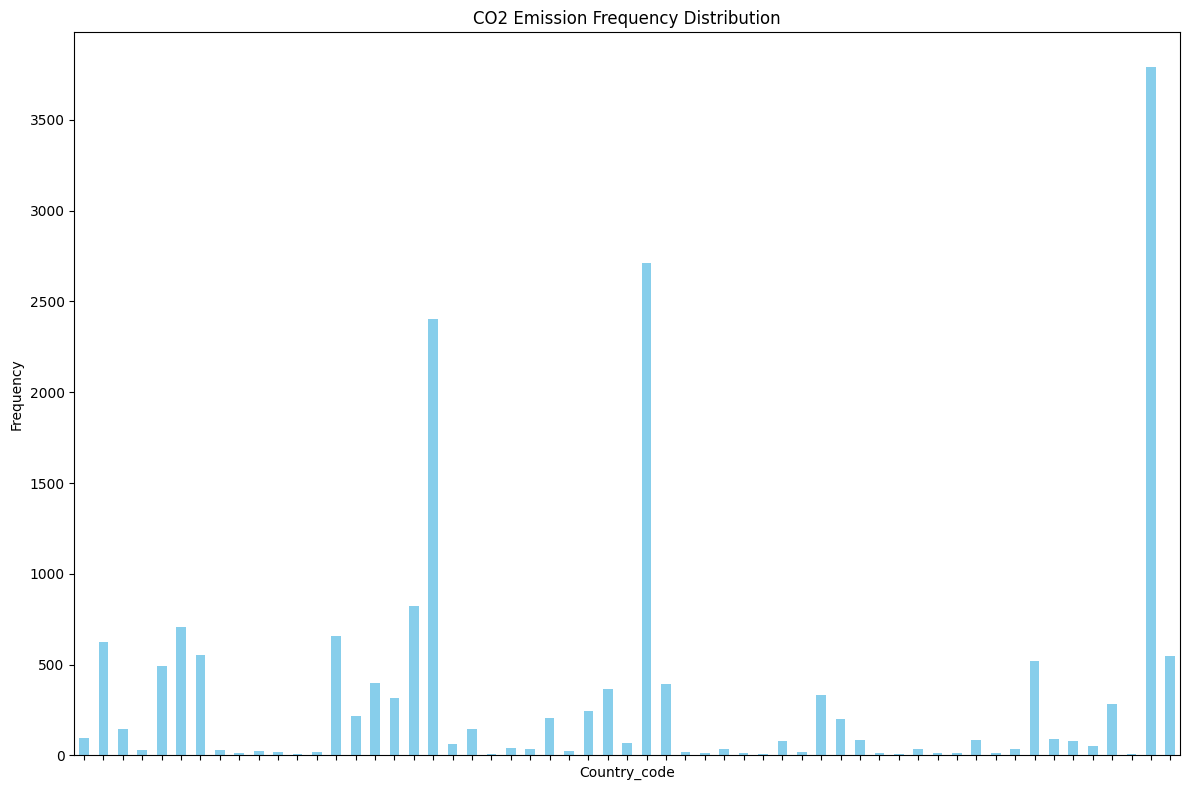

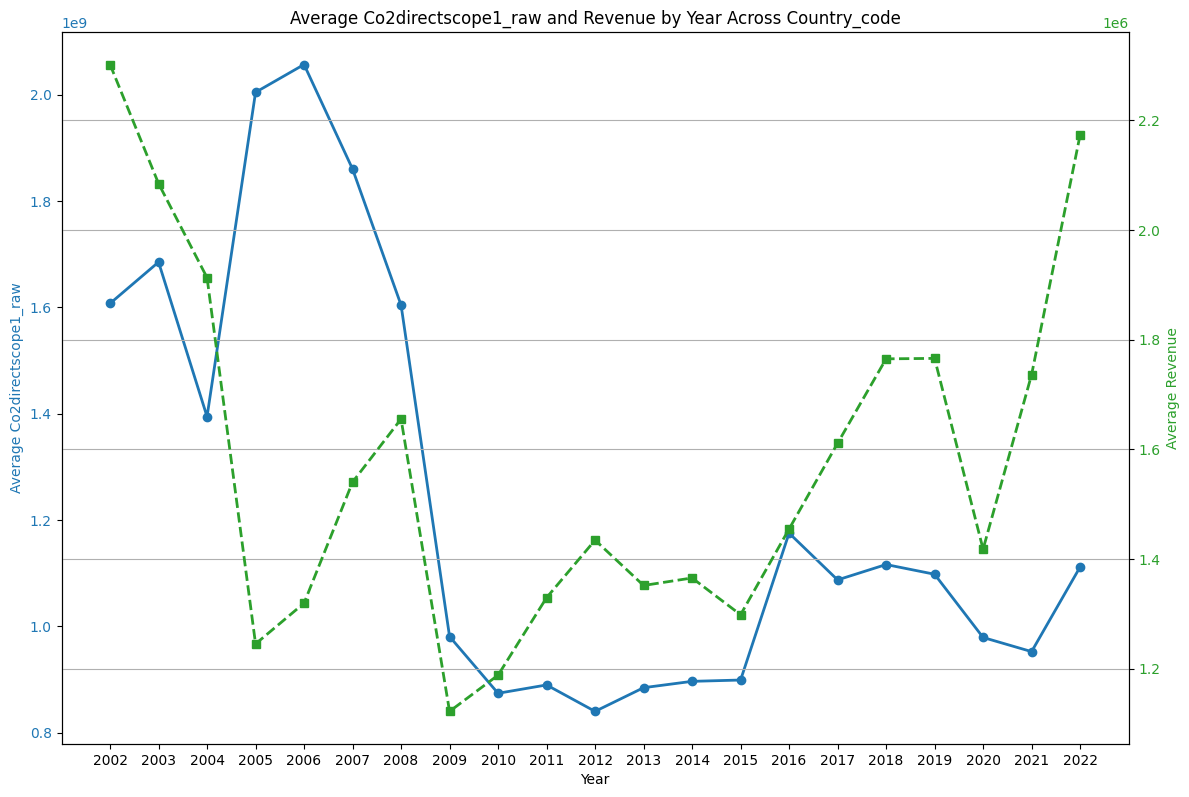

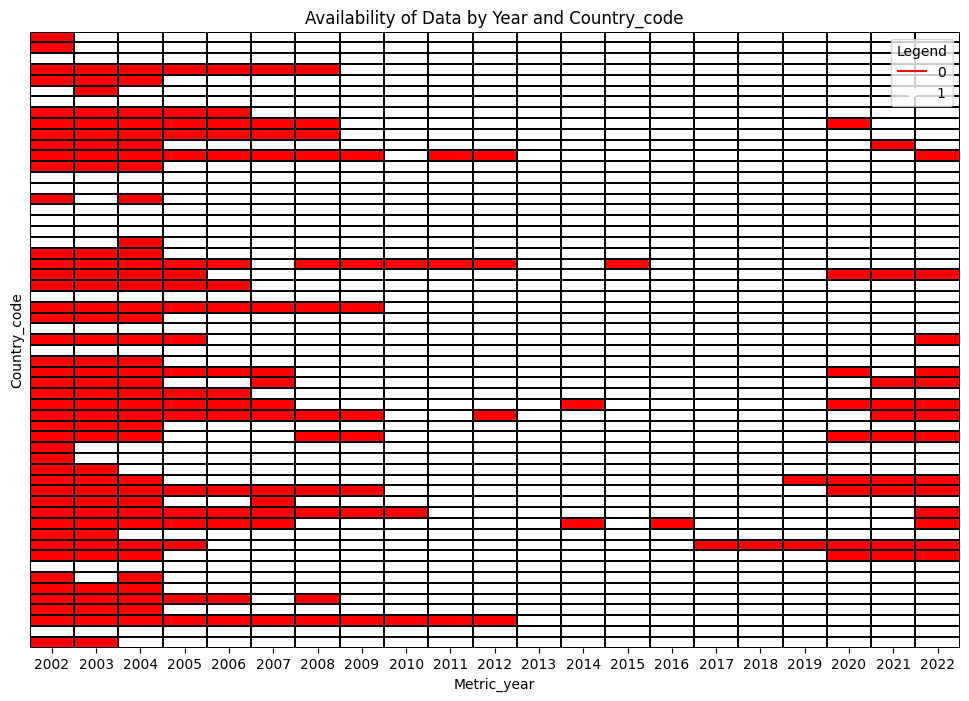

In [82]:
# Frequency Distribution and Combined Bar Plot
plot_category_frequency_and_means(
    data, 
    group_col='country_code', 
    value_col1='co2directscope1_raw', 
    value_col2='revenue', 
    title_prefix1='CO2 Emission', 
    title_prefix2='Revenue'
)

# Average Country CO2 Emissions and Country Revenue Plot
plot_group_avg_co2_and_revenue(
    data=data, 
    group_col='country_code', 
    metric_year_col='metric_year', 
    co2_col='co2directscope1_raw', 
    revenue_col='revenue'
)

# Heatmap for Data Availability
plot_heatmap(
    data, 
    index_col='country_code', 
    columns_col='metric_year'
)

## Plot for industry-wise CO2 emissions and revenue

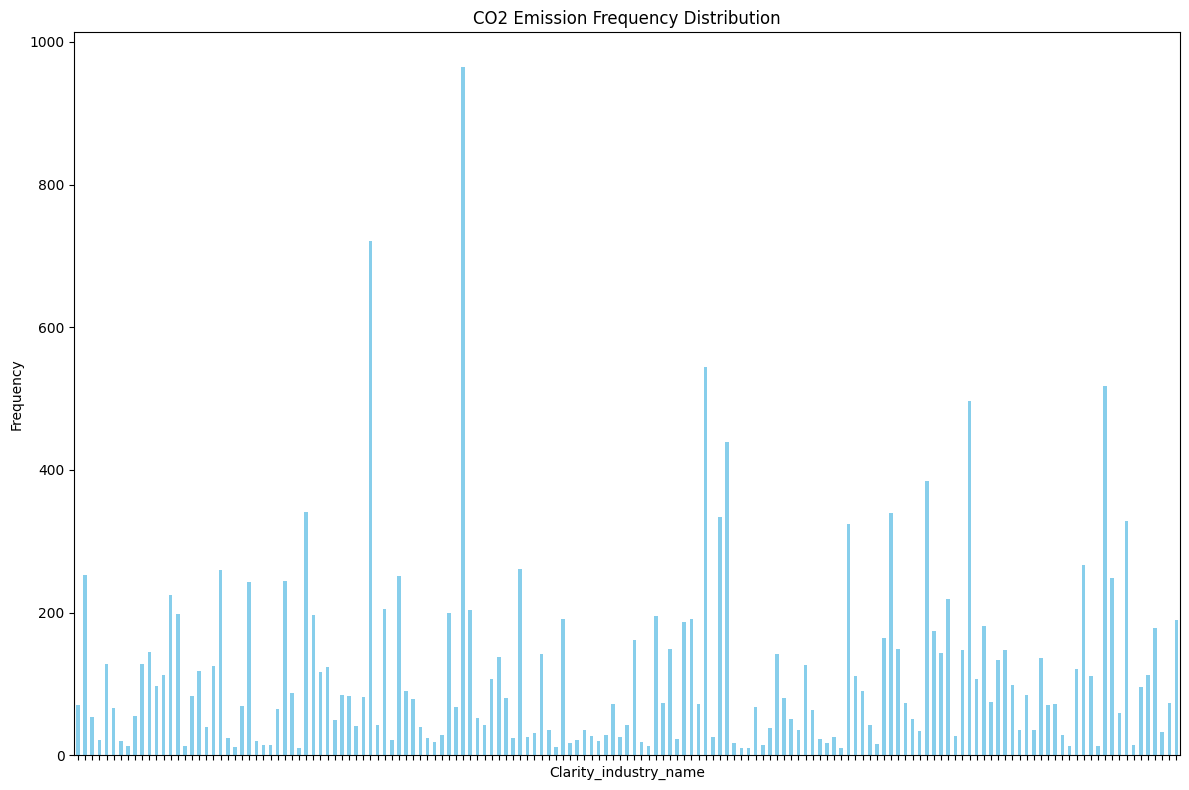

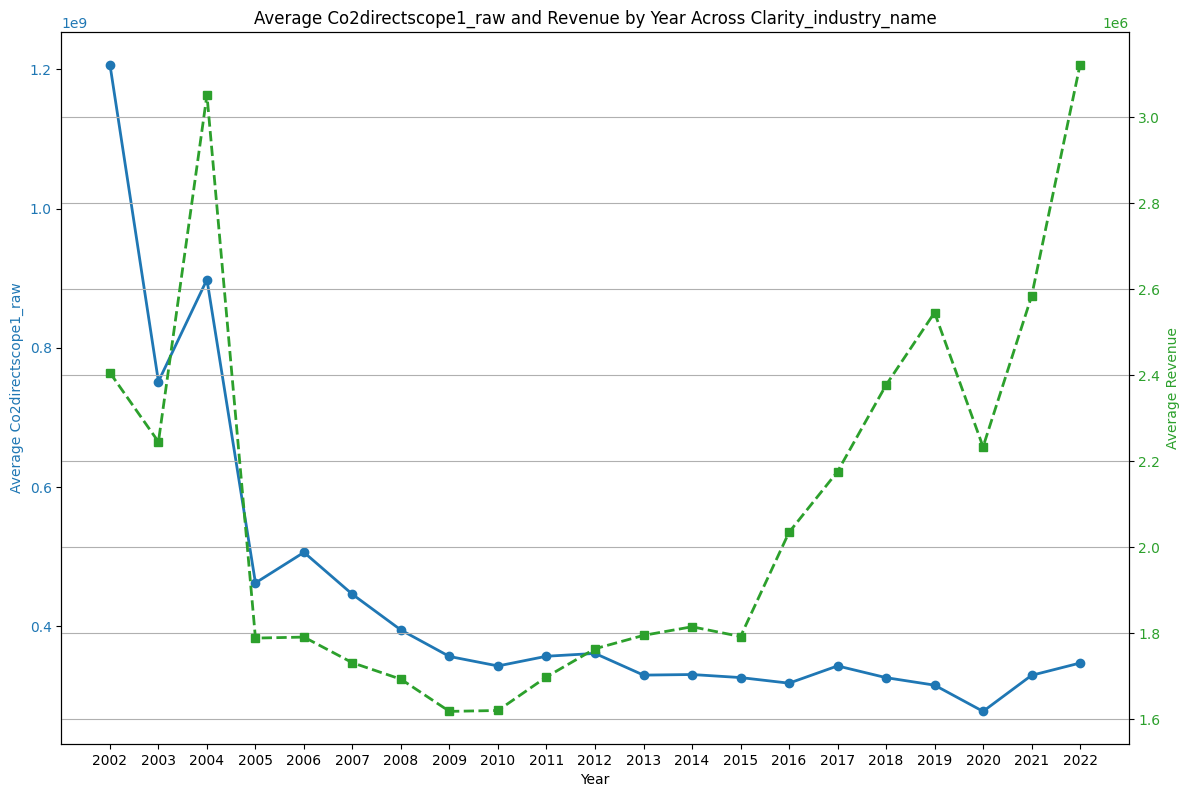

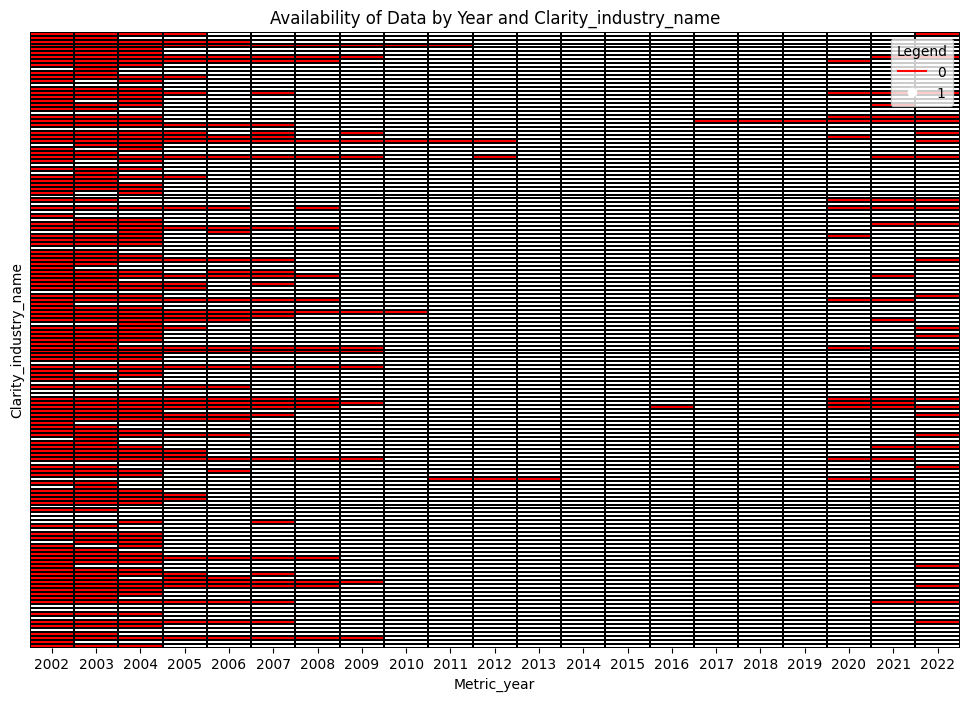

In [83]:
# Frequency Distribution
plot_category_frequency_and_means(
    data, 
    group_col='clarity_industry_name', 
    value_col1='co2directscope1_raw', 
    value_col2='revenue', 
    title_prefix1='CO2 Emission', 
    title_prefix2='Revenue'
)

# Average Industry CO2 Emissions and Industry Revenue Plot
plot_group_avg_co2_and_revenue(
    data=data, 
    group_col='clarity_industry_name', 
    metric_year_col='metric_year', 
    co2_col='co2directscope1_raw', 
    revenue_col='revenue'
)

# Heatmap for Data Availability
plot_heatmap(
    data, 
    index_col='clarity_industry_name', 
    columns_col='metric_year'
)

## Plot for company-wise CO2 emissions and revenue 

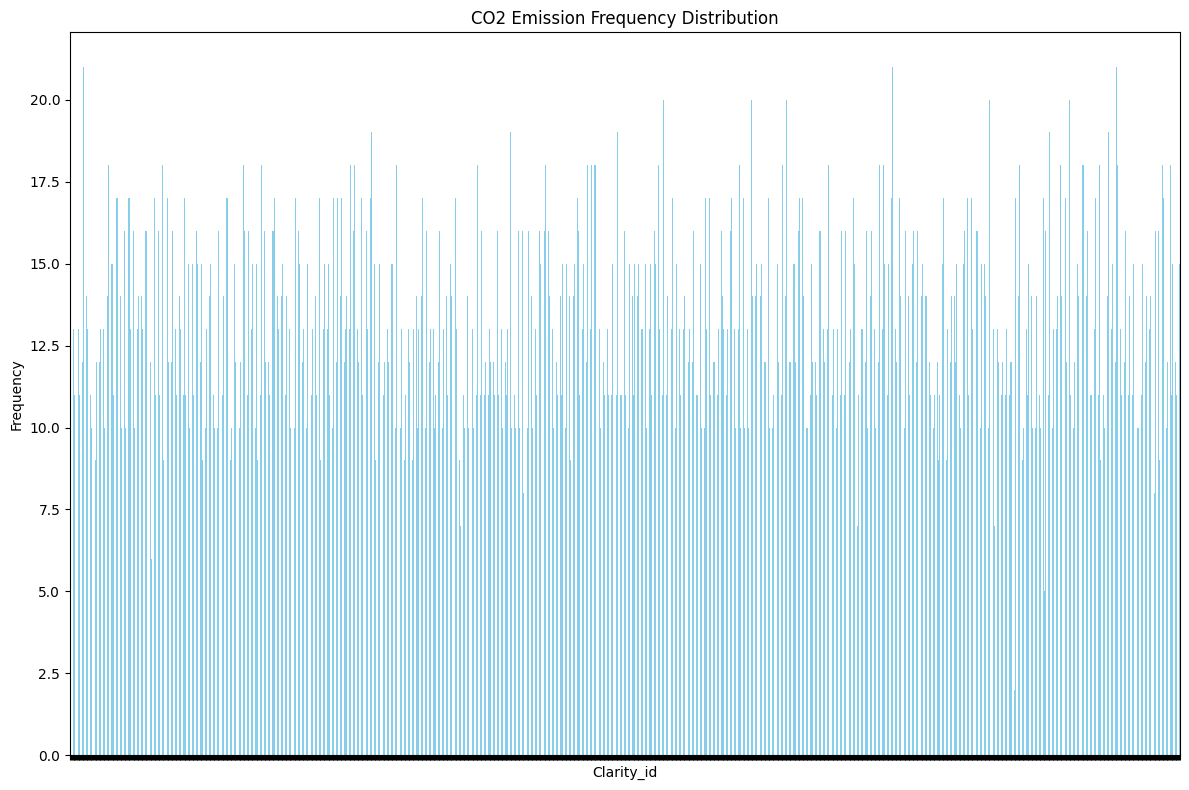

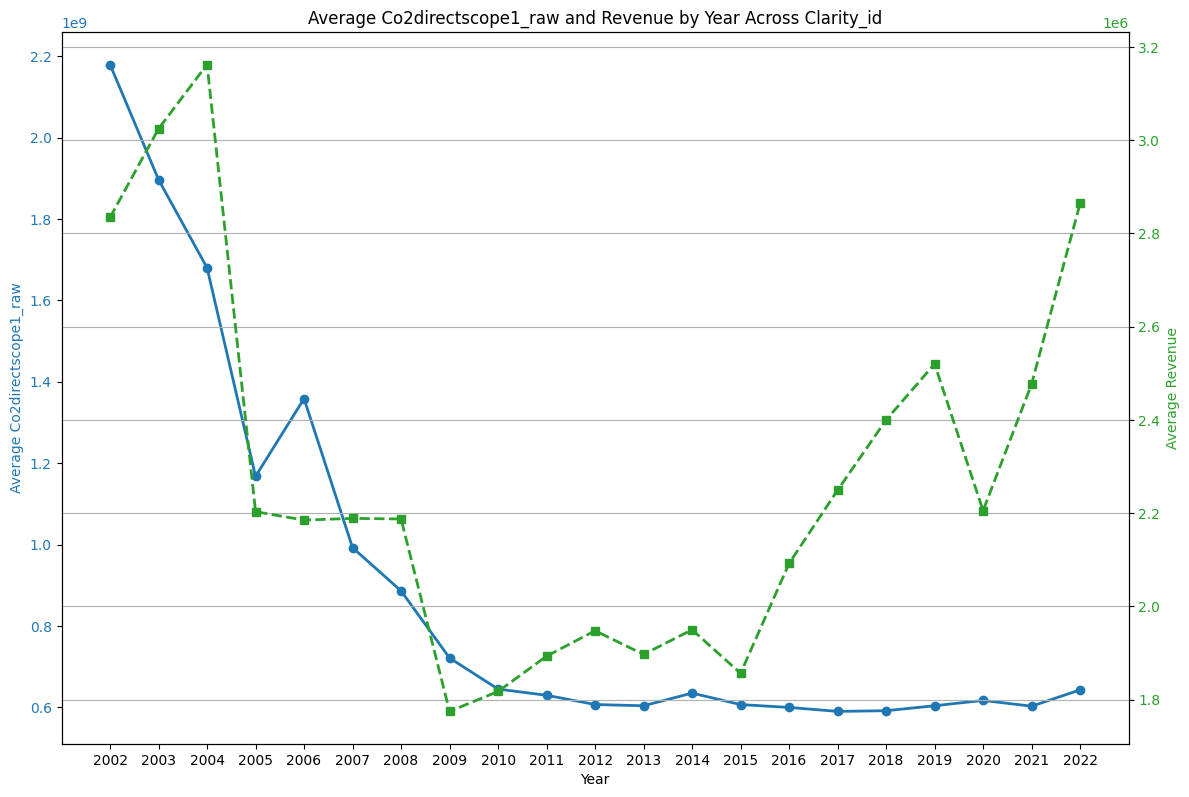

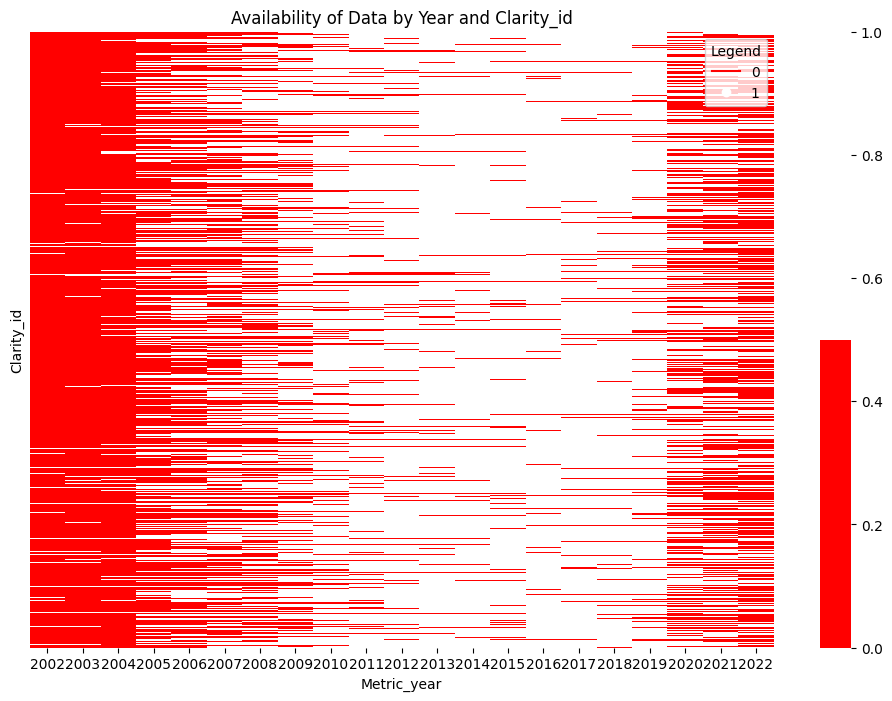

In [84]:
# Frequency Distribution
plot_category_frequency_and_means(
    data, 
    group_col='clarity_id', 
    value_col1='co2directscope1_raw', 
    value_col2='revenue', 
    title_prefix1='CO2 Emission', 
    title_prefix2='Revenue'
)

# Average Company CO2 Emissions and Company Revenue Plot
plot_group_avg_co2_and_revenue(
    data=data, 
    group_col='clarity_id', 
    metric_year_col='metric_year', 
    co2_col='co2directscope1_raw', 
    revenue_col='revenue'
)

# Heatmap for Data Availability
plot_heatmap_company(
    data, 
    index_col='clarity_id', 
    columns_col='metric_year'
)

### Key Insights:

1. **Correlation Between Categorical Variables and CO2 Emissions:**
   - The visualizations indicate that average revenue, average CO2 emissions, and frequency counts differ significantly across countries, industries, and companies. This suggests that these categorical variables (country, industry, and company) are correlated with CO2 emissions. Understanding these correlations is crucial for predicting CO2 emissions accurately.

2. **Data Gaps Over the Years:**
   - The heatmaps reveal that the data is not fully continuous over the years for most categories (country-wise, industry-wise, and company-wise). This indicates that there are significant gaps in the data, which could impact the analysis and prediction models.

# Analysis On Commitment Binary Variables

In [68]:
# Function to preprocess categorical variables
def preprocess_categorical(data, columns):
    for col in columns:
        data[col] = data[col].replace({0: 'No', 1: 'Yes'})  # Correct mapping
        data[col] = pd.Categorical(data[col], categories=['Yes', 'No'])
        data[col] = data[col].replace({np.nan: 'Unknown'})
    return data

# Function to plot frequency distribution and average values
def plot_frequency_distribution(data, group_col, title_prefix):
    # Group data by year and categorical variable to count occurrences
    year_frequency = data.groupby(['metric_year', group_col]).size().unstack(fill_value=0)
    
    year_frequency.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Frequency Distribution of "{title_prefix}" by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Records')
    plt.legend(title=title_prefix)
    plt.show()

# Function to plot box plots
def plot_boxplot(data, group_col, value_col, title_prefix):
    sns.boxplot(x=group_col, y=value_col, data=data)
    plt.title(f'Log-Scaled Box Plot of {value_col} by {title_prefix}')
    plt.ylabel(f'Log of {value_col}')
    plt.show()

## Target Emissions

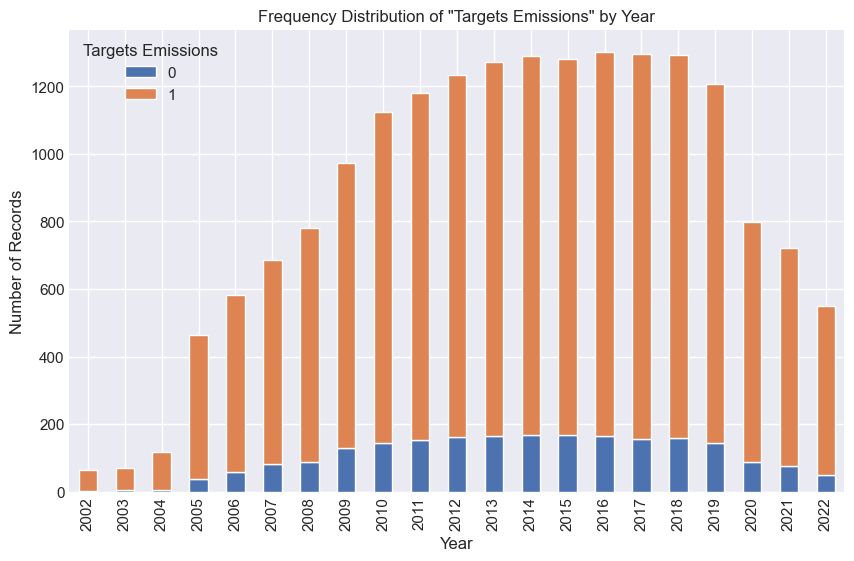

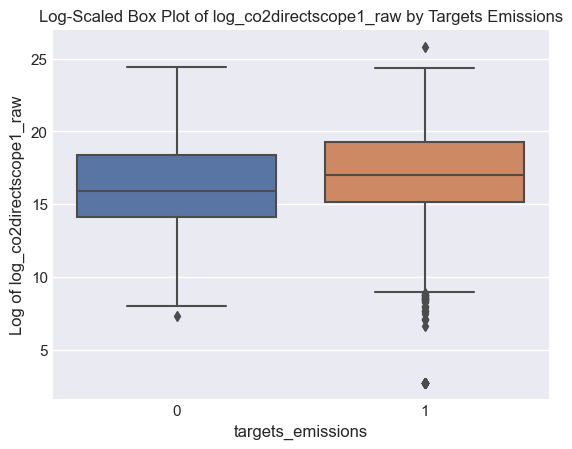

Kruskal-Wallis test for targets_emissions:
Statistic: 176.63738929796256, P-value: 2.6281623758032734e-40



In [71]:
# Apply log scale to 'co2directscope1_raw' to handle wide range values
data['log_co2directscope1_raw'] = np.log1p(data['co2directscope1_raw'])

# Targets Emissions
plot_frequency_distribution(data, 'targets_emissions', 'Targets Emissions')
plot_boxplot(data, 'targets_emissions', 'log_co2directscope1_raw', 'Targets Emissions')

# Statistical test for targets_emissions
groups = [group['co2directscope1_raw'].dropna().values for name, group in data.groupby('targets_emissions') if group.shape[0] > 1]
if len(groups) > 1:
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis test for targets_emissions:\nStatistic: {stat}, P-value: {p_value}\n")
else:
    print("Kruskal-Wallis test for targets_emissions: Not enough data\n")

## Policy Emissions

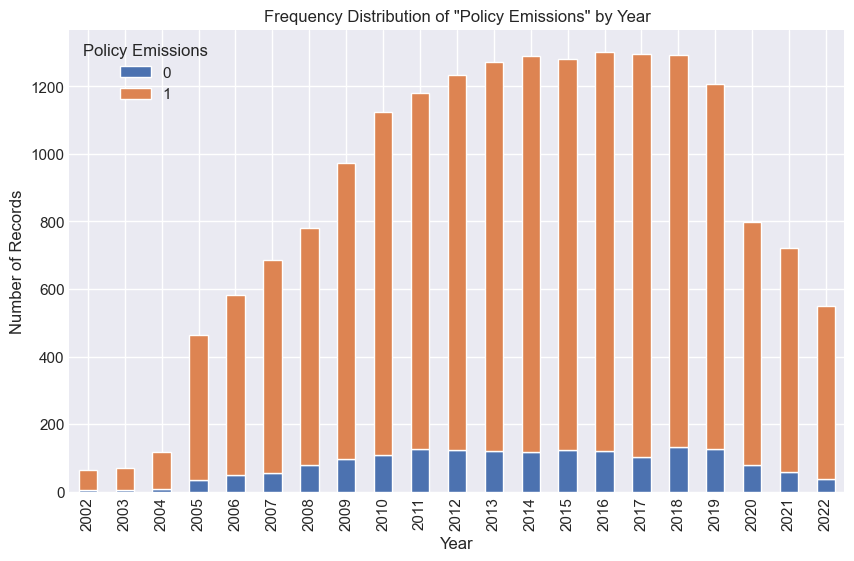

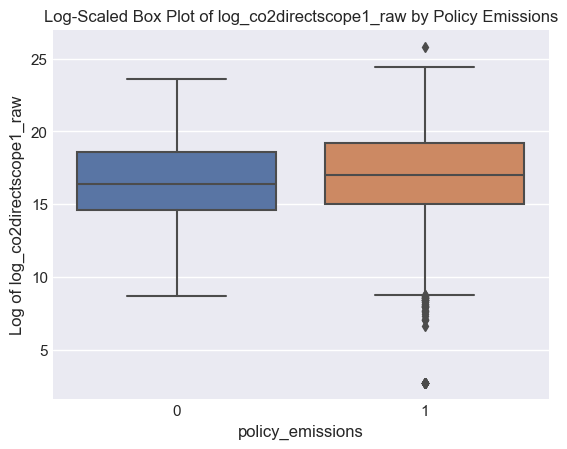

Kruskal-Wallis test for policy_emissions:
Statistic: 35.286826598660475, P-value: 2.845502614660994e-09



In [72]:
# Policy Emissions
plot_frequency_distribution(data, 'policy_emissions', 'Policy Emissions')
plot_boxplot(data, 'policy_emissions', 'log_co2directscope1_raw', 'Policy Emissions')

# Statistical test for policy_emissions
groups = [group['co2directscope1_raw'].dropna().values for name, group in data.groupby('policy_emissions') if group.shape[0] > 1]
if len(groups) > 1:
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis test for policy_emissions:\nStatistic: {stat}, P-value: {p_value}\n")
else:
    print("Kruskal-Wallis test for policy_emissions: Not enough data\n")


# SBTi Alignment

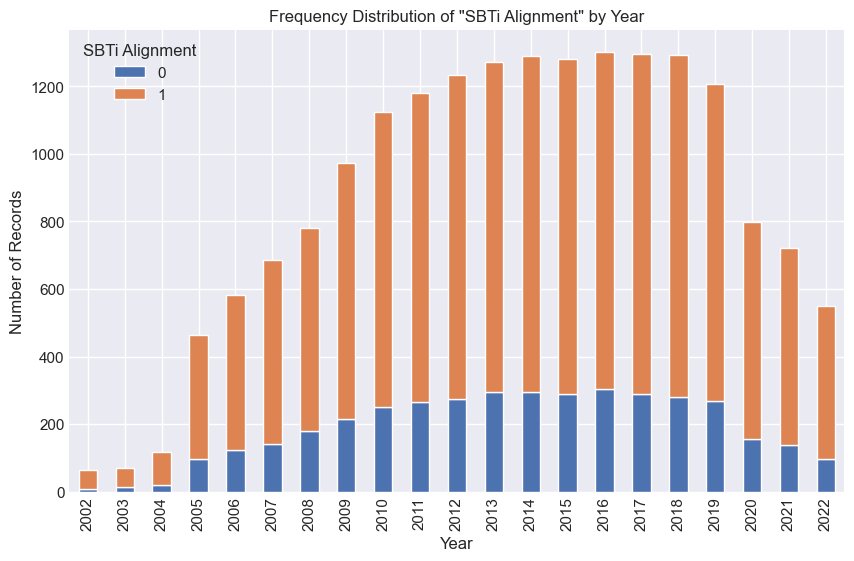

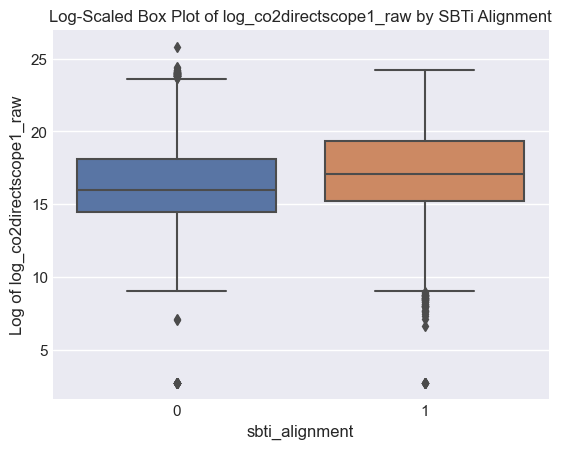

Kruskal-Wallis test for sbti_alignment:
Statistic: 253.13912186436852, P-value: 5.371548779464277e-57



In [73]:
# SBTi Alignment
plot_frequency_distribution(data, 'sbti_alignment', 'SBTi Alignment')
plot_boxplot(data, 'sbti_alignment', 'log_co2directscope1_raw', 'SBTi Alignment')

# Statistical test for sbti_alignment
groups = [group['co2directscope1_raw'].dropna().values for name, group in data.groupby('sbti_alignment') if group.shape[0] > 1]
if len(groups) > 1:
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis test for sbti_alignment:\nStatistic: {stat}, P-value: {p_value}\n")
else:
    print("Kruskal-Wallis test for sbti_alignment: Not enough data\n")

# NZ Statement

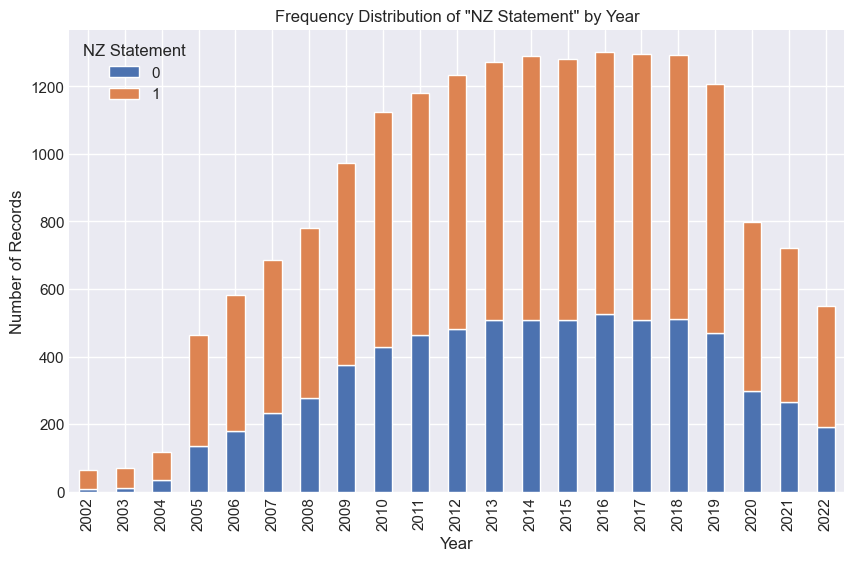

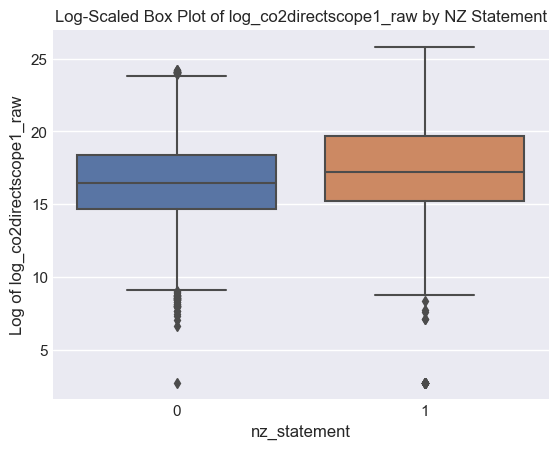

Kruskal-Wallis test for nz_statement:
Statistic: 324.17539075237494, P-value: 1.7841396360018294e-72



In [74]:
# NZ Statement
plot_frequency_distribution(data, 'nz_statement', 'NZ Statement')
plot_boxplot(data, 'nz_statement', 'log_co2directscope1_raw', 'NZ Statement')

# Statistical test for nz_statement
groups = [group['co2directscope1_raw'].dropna().values for name, group in data.groupby('nz_statement') if group.shape[0] > 1]
if len(groups) > 1:
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis test for nz_statement:\nStatistic: {stat}, P-value: {p_value}\n")
else:
    print("Kruskal-Wallis test for nz_statement: Not enough data\n")

- The analysis shows that all four categorical variables—targets emissions, policy emissions, SBTi alignment, and NZ statement—are statistically significant predictors of CO2 emissions. Their extremely low p-values suggest that these features capture meaningful differences in emission levels among companies. Therefore, these features should be considered important predictors in any model aiming to predict CO2 emissions.
- Companies with commitments such as target emissions, policy emissions, and Net Zero statements typically emit more CO2 than those without. 
- However, those aligned with the SBTi generally have lower emissions. This is because companies that emit more CO2 are more likely to adopt commitments like target emission, policy emissions and Net Zero statements, but less likely to commit to SBTi alignment.

# Environmental Commitments and Revenue Quartiles

The plot suggests that companies in different revenue quartiles show varying levels of commitment to environmental initiatives, with those in the highest revenue quartile (Q4) generally being more likely to adopt environmental commitments, except for SBTi alignment (Fig. 8). This indicates that revenue is correlated with the likelihood of a company making environmental commitments, which could imply that companies with higher revenues have more resources to invest in such initiatives.

Given this observation, revenue appears to be a significant factor in determining a company's environmental behavior. Therefore, it would make sense to include revenue as a feature in a tree-based model, as it might help the model capture relationships between a company's financial capacity and its environmental actions, potentially improving the accuracy of CO2 emission predictions.

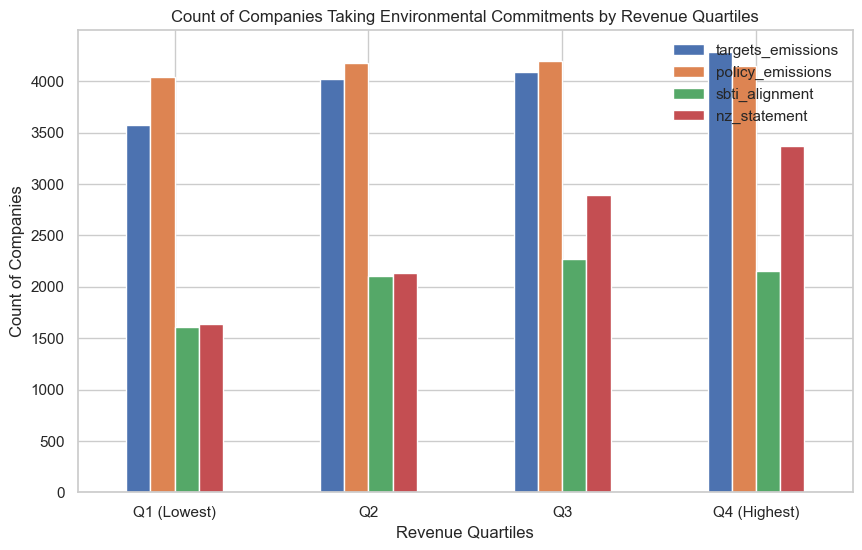

In [37]:
data.dropna(subset=['revenue'], inplace=True)

# Convert revenue and environmental actions to appropriate types
data['revenue'] = data['revenue'].astype(float)
data['targets_emissions'] = data['targets_emissions'].apply(lambda x: 1 if x == 100 else 0)
data['policy_emissions'] = data['policy_emissions'].apply(lambda x: 1 if x == 100 else 0)
data['sbti_alignment'] = data['sbti_alignment'].apply(lambda x: 1 if x == 100 else 0)
data['nz_statement'] = data['nz_statement'].apply(lambda x: 1 if x == 100 else 0)

# Group by revenue quartile
data['revenue_quartile'] = pd.qcut(data['revenue'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Sum up each action within each quartile
counts_by_revenue = data.groupby('revenue_quartile')[['targets_emissions', 'policy_emissions', 'sbti_alignment', 'nz_statement']].sum()

# Plotting
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
counts_by_revenue.plot(kind='bar', ax=ax)
ax.set_title('Count of Companies Taking Environmental Commitments by Revenue Quartiles')
ax.set_xlabel('Revenue Quartiles')
ax.set_ylabel('Count of Companies')
ax.set_xticklabels(['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'], rotation=0)
plt.show()
